# Predict Severity of Tumor

## Data

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign


## Preparing Tools


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/tensorflow/Data/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [4]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploratory Data Analysis or EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Check for missing values

In [8]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [24]:
data.shape

(569, 31)

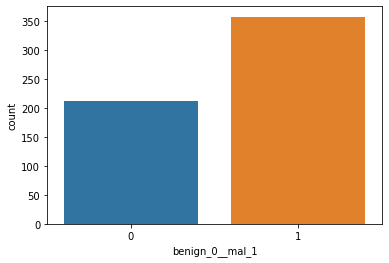

In [10]:
sns.countplot(x='benign_0__mal_1', data=data);

Checking the correlations

In [12]:
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [16]:
data.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

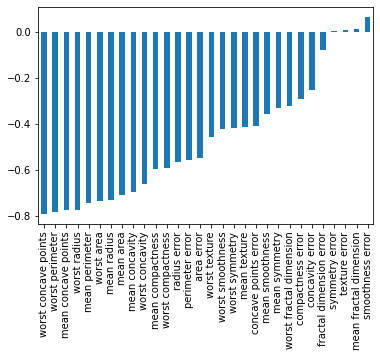

In [19]:
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

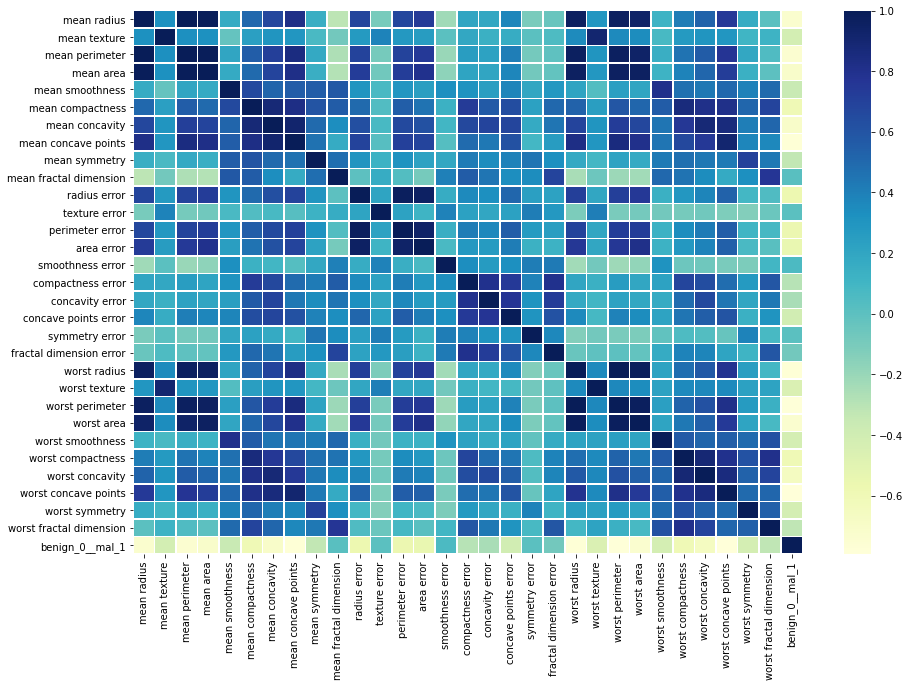

In [20]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 linewidths=0.5,
                 cmap='YlGnBu')

## Modelling

In [0]:
# Create X and y
X = data.drop('benign_0__mal_1', axis=1).values
y = data['benign_0__mal_1'].values

# Split into train & test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42 )

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [40]:
X_train, X_test

(array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
         1.175e-01],
        [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
         1.284e-01],
        [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
         8.490e-02],
        ...,
        [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
         6.120e-02],
        [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
         1.055e-01],
        [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
         6.878e-02]]),
 array([[1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
         8.750e-02],
        [1.894e+01, 2.131e+01, 1.236e+02, ..., 1.789e-01, 2.551e-01,
         6.589e-02],
        [1.546e+01, 1.948e+01, 1.017e+02, ..., 1.514e-01, 2.837e-01,
         8.019e-02],
        ...,
        [1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
         7.809e-02],
        [1.422e+01, 2.785e+01, 9.255e+01, ..., 8.219e-02, 1.890e-01,
   

Preporcessing



***Feature Scaling*** 

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train[0], X_test[0]

(array([0.06552721, 0.25769361, 0.07732252, 0.03436883, 0.48722578,
        0.41750565, 0.73336457, 0.21744533, 0.50400427, 0.64237574,
        0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
        0.62943491, 0.76717172, 0.62928585, 0.63623129, 0.29933115,
        0.05964476, 0.28331557, 0.05597072, 0.02508436, 0.523195  ,
        0.44938009, 1.        , 0.60137457, 0.52493594, 0.52950153]),
 array([0.23404672, 0.30064254, 0.23595106, 0.13365657, 0.42448316,
        0.29593863, 0.18755858, 0.18991054, 0.40469834, 0.29001685,
        0.10305993, 0.1511227 , 0.08198652, 0.04387017, 0.17812829,
        0.12661099, 0.06820707, 0.19643872, 0.18548658, 0.09297569,
        0.22995395, 0.33635394, 0.21127548, 0.11271834, 0.48515927,
        0.23117471, 0.21333866, 0.34879725, 0.2856298 , 0.27517803]))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
 
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# sigmoid - because of binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam')

In [44]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test))

Epoch 1/600
15/15 [==============================] - 0s 14ms/step - loss: 0.7282 - val_loss: 0.7205
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6910 - val_loss: 0.6789
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6536 - val_loss: 0.6317
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6211 - val_loss: 0.5874
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5801 - val_loss: 0.5491
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5427 - val_loss: 0.5090
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5026 - val_loss: 0.4649
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4596 - val_loss: 0.4179
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4181 - val_loss: 0.3685
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3752 - val_loss: 0.3283
Epoch 11

In [0]:
losses = pd.DataFrame(model.history.history)

In [46]:
losses

,loss,val_loss
0,0.728176,0.720452
1,0.691026,0.678927
2,0.653565,0.631746
3,0.621076,0.587397
4,0.580115,0.549109
...,...,...
595,0.006276,0.126875
596,0.008171,0.141845
597,0.007295,0.126509
598,0.003267,0.127944


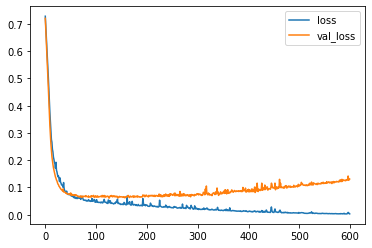

In [47]:
losses.plot()

Above is the example of overfitting

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# sigmoid - because of binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam')

### Early Stopping Callback

In [0]:
from tensorflow.keras.callbacks import EarlyStopping 

# we want to minimize the loss that's why our mode is 'min'
# If our metric is accuracy then our mode would be 'max'
# Bcoz accuracy is something that you want to maximize 
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           patience=20,
                           verbose=1)

In [67]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6792 - val_loss: 0.6481
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6248 - val_loss: 0.5965
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5699 - val_loss: 0.5411
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5189 - val_loss: 0.4782
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4588 - val_loss: 0.4146
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4061 - val_loss: 0.3590
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3650 - val_loss: 0.3142
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3163 - val_loss: 0.2797
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2884 - val_loss: 0.2514
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2705 - val_loss: 0.2271
Epoch 11/

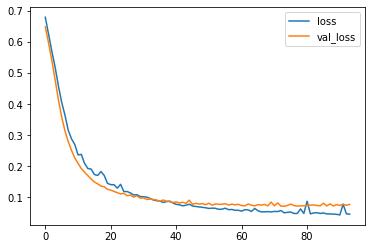

In [69]:
losses = pd.DataFrame(model.history.history)
losses.plot();

### Dropout Layers
  
Dropout layers will essentially turn off the percentage of neurons randomly


In [0]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))  # rate - between 0 and 1, fraction of which your turning them off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# sigmoid - because of binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam') 

In [71]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
15/15 [==============================] - 0s 8ms/step - loss: 0.7084 - val_loss: 0.6812
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6786 - val_loss: 0.6605
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6611 - val_loss: 0.6324
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6469 - val_loss: 0.5924
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.5583
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.5289
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5676 - val_loss: 0.4924
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5313 - val_loss: 0.4589
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5014 - val_loss: 0.4303
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4672 - val_loss: 0.4001
Epoch 11/

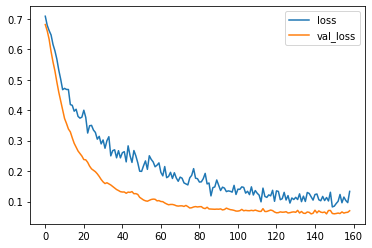

In [72]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [73]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [75]:
print(confusion_matrix(y_test, predictions))

[[42  1]
 [ 2 69]]
